# Bike Rental Sharing Predictions
**Dataset Overview:** This dataset includes daily and hourly counts of rental bikes from the Capital Bike Share system for 2011-2012, along with weather and seasonal data. Bike-sharing systems, which automate rentals and returns, are rapidly growing in popularity worldwide, offering sustainable solutions to urban transportation and health challenges.

**Objective:** This notebook demonstrates the use of Azure Machine Learning to predict daily bike rental counts by building and evaluating various machine learning models. The goal is to identify key factors influencing demand and determine the most accurate prediction model.

**Key Steps:**

1. Data Preparation: Load and preprocess the dataset, including feature scaling and engineering from weather and seasonal data.
2. Model Selection:Train and compare models like Linear Regression, Decision Tree Regression, and SGD regression.
Leverage Azure ML for experiment tracking and result logging.
3. Model Evaluation: Assess performance using MSE, RMSE, and R-Squared. Compare predicted vs actual rentals to gauge model accuracy.
4. Visualization: Plot predictions against actual data to visualize model performance and key influencing factors (e.g., temperature, season).

**Outcomes:** 
- Identify the best-performing model for predicting bike rentals.
- Understand how variables like weather and seasonality impact bike demand.
- Visualize model results and key insights clearly for stakeholders.

## Data Preparation

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from azureml.core import Experiment
from azureml.core import Workspace

In [2]:
# Save data into Pandas Dataframe
df=pd.read_csv('bike.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# List column headers
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [5]:
# Separate features and label

columns = ['season', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

X = df[columns[:-1]]
y = df[columns[-1]]

In [6]:
# Split data 70/30 into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
# Set workspace
ws = Workspace.from_config()

In [8]:
# Set an experiment
experiment = Experiment(workspace=ws, name="bike_rentals")

## Linear Regression
Linear Regression is a simple yet effective algorithm for predicting a continuous variable by modeling the relationship between the target variable and features as a linear equation.

In [9]:
# Log data from experiment. Obtain a reference to the experiment run
run = experiment.start_logging()

In [10]:
# Train the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Fit linear regression model to the training set
model = LinearRegression().fit(X_train_scaled, y_train)

In [11]:
# Make predictions on test dataset
predictions = model.predict(X_test)

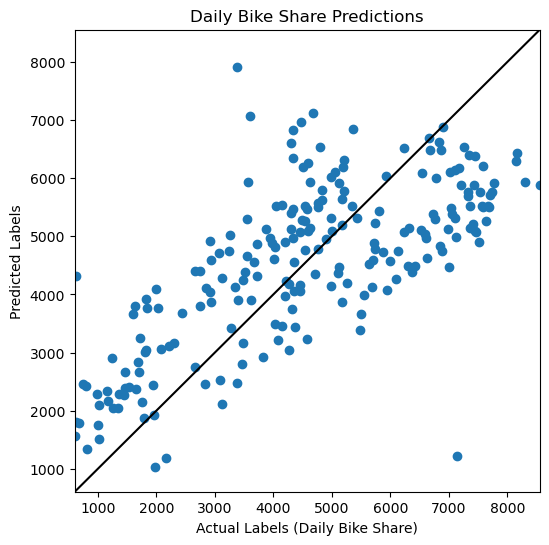

In [12]:
# Plot predicted vs actual
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(y_test, predictions)
ax.set_xlabel('Actual Labels (Daily Bike Share)')
ax.set_ylabel('Predicted Labels')
ax.set_title('Daily Bike Share Predictions')

# Correcting the min and max calls
minimum_value = min(predictions.min(), y_test.min())
maximum_value = max(predictions.max(), y_test.max())

# Set limits for the plot
ax.set_ylim(minimum_value, maximum_value)
ax.set_xlim(minimum_value, maximum_value)

# Plot the line of perfect predictions
ax.plot([minimum_value, maximum_value], [minimum_value, maximum_value], 'k-')

plt.show()

In [13]:
# Calculate and print metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 2105638.3356097783
RMSE: 1451.0817811583806
R2: 0.4980675225992941


In [14]:
# Logging Metrics
run.display_name = 'Linear regression'
run.log_image(name='Bike share predictions', plot=plt)
run.log('R^2', r2)
run.log('MSE', mse)
run.log('RMSE', rmse)

<Figure size 640x480 with 0 Axes>

In [15]:
# View/save metrics
run.get_metrics()

run.complete()

## Decision Tree Regression
Decision Tree Regression builds a model by splitting the dataset into smaller subsets, based on feature values, and making predictions using a tree structure.

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Log experiment
run = experiment.start_logging()

In [17]:
# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)

In [18]:
# Evaluate the model using the test data
predictions = model.predict(X_test)

In [19]:
# Calculate and print metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 2831119.2100456622
RMSE: 1682.5930019008347
R2: 0.325130695579102


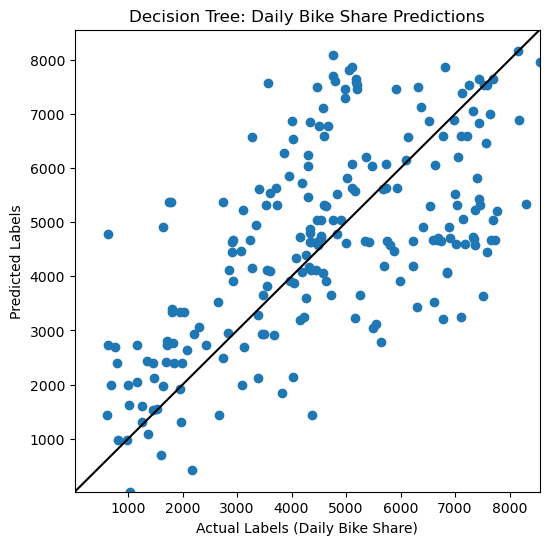

In [20]:
# Plot predicted vs actual
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(y_test, predictions)
ax.set_xlabel('Actual Labels (Daily Bike Share)')
ax.set_ylabel('Predicted Labels')
ax.set_title('Decision Tree: Daily Bike Share Predictions')

# Correcting the min and max calls
minimum_value = min(predictions.min(), y_test.min())
maximum_value = max(predictions.max(), y_test.max())

# Set limits for the plot
ax.set_ylim(minimum_value, maximum_value)
ax.set_xlim(minimum_value, maximum_value)

# Plot the line of perfect predictions
ax.plot([minimum_value, maximum_value], [minimum_value, maximum_value], 'k-')

plt.show()

In [21]:
# Logging Metrics
run.display_name = 'Decision Tree Regression'
run.log_image(name='Decision Tree Predictions', plot=plt)
run.log('R^2', r2)
run.log('MSE', mse)
run.log('RMSE', rmse)

<Figure size 640x480 with 0 Axes>

In [22]:
# View/save metrics
run.get_metrics()

run.complete()

## Stochastic Gradient Descent (SGD) Regression
SGD Regression is an iterative method for optimizing a loss function, useful for large datasets or when using regularization techniques.

In [31]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Log experiment
run = experiment.start_logging()

In [34]:
# Train the SGD model on scaled data
model = SGDRegressor().fit(X_train_scaled, y_train)

In [35]:
# Make predictions using the test data
predictions = model.predict(X_test_scaled)

In [36]:
# Calculate and print metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 1999254.1688574003
RMSE: 1413.949846655602
R2: 0.5234268957980004


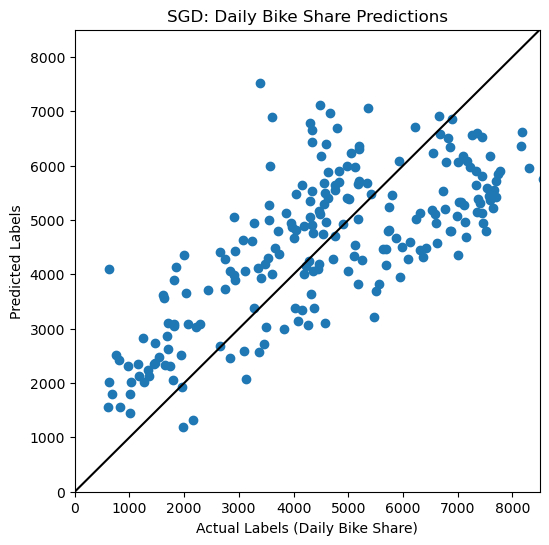

In [43]:
# Plot predicted vs actual with zoomed-in limits
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(y_test, predictions)
ax.set_xlabel('Actual Labels (Daily Bike Share)')
ax.set_ylabel('Predicted Labels')
ax.set_title('SGD: Daily Bike Share Predictions')

# Manually set limits to zoom into reasonable ranges (change these as needed)
ax.set_xlim(0, 8500)  # Example range, adjust according to your data distribution
ax.set_ylim(0, 8500)

# Plot the line of perfect predictions
ax.plot([0, 8500], [0, 8500], 'k-')

plt.show()


In [37]:
# Logging Metrics
run.display_name = 'SGD Regression'
run.log_image(name='SGD Predictions', plot=plt)
run.log('R^2', r2)
run.log('MSE', mse)
run.log('RMSE', rmse)

<Figure size 640x480 with 0 Axes>

In [38]:
# View/save metrics
run.get_metrics()
run.complete()

## Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Log experiment
run = experiment.start_logging()

In [46]:
# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [47]:
# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Make predictions on the test data
rf_predictions = rf_model.predict(X_test_scaled)

In [49]:

# Calculate evaluation metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

# Print out metrics for comparison
print("Random Forest MSE:", rf_mse)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2:", rf_r2)

Random Forest MSE: 1692555.7872913242
Random Forest RMSE: 1300.9826237468833
Random Forest R2: 0.5965362592963939


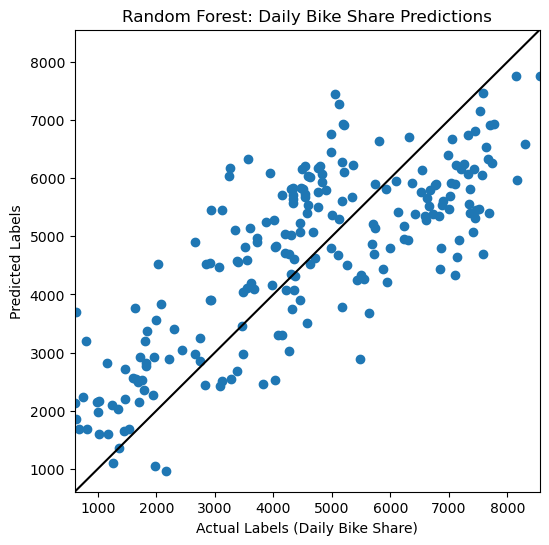

In [50]:
# Plot predicted vs actual values
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(y_test, rf_predictions)
ax.set_xlabel('Actual Labels (Daily Bike Share)')
ax.set_ylabel('Predicted Labels')
ax.set_title('Random Forest: Daily Bike Share Predictions')

# Correcting the min and max calls
minimum_value = min(rf_predictions.min(), y_test.min())
maximum_value = max(rf_predictions.max(), y_test.max())

# Set limits for the plot
ax.set_ylim(minimum_value, maximum_value)
ax.set_xlim(minimum_value, maximum_value)

# Plot the line of perfect predictions
ax.plot([minimum_value, maximum_value], [minimum_value, maximum_value], 'k-')

plt.show()

In [51]:
# Log metrics in Azure ML
run.display_name = 'Random Forest Regression'
run.log_image(name='Random Forest Predictions', plot=plt)
run.log('R^2', rf_r2)
run.log('MSE', rf_mse)
run.log('RMSE', rf_rmse)

<Figure size 640x480 with 0 Axes>

In [52]:
# Save and complete the run
run.complete()

## Results

In this analysis, we evaluated four different regression models to predict daily bike share demand using various metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score. Below is a summary of the results for each model:

1. **Linear Regression**: The Linear Regression model yielded an MSE of 2,105,638.34 and an RMSE of 1,451.08. The R² score of 0.4981 indicates that the model explains approximately 49.8% of the variance in the data. While not the best-performing model, Linear Regression offers a good baseline for comparison.
2. **Decision Tree Regression**: The Decision Tree model showed the highest MSE (2,831,119.21) and RMSE (1,682.59) of all models, with a relatively low R² score of 0.3251. This suggests that the model is prone to overfitting, performing worse on the test set compared to other models.
3. **SGD Regression**:The Stochastic Gradient Descent (SGD) model achieved a lower MSE (1,999,254.17) and RMSE (1,413.95) than Linear Regression and Decision Tree models. The R² score of 0.5234 shows a modest improvement in explaining the variance in the data.
4. **Random Forest Regression**: The Random Forest model outperformed the other models in all metrics, with the lowest MSE (1,692,555.79) and RMSE (1,300.98), and the highest R² score of 0.5965. This suggests that the ensemble approach of Random Forest successfully captures more complex patterns in the data, leading to better overall performance.

## Conclusion
The Random Forest Regression model yielded the best results, with the lowest error rates (MSE, RMSE) and the highest R² score. It is the most effective model in predicting daily bike share demand for this dataset, followed by SGD Regression and Linear Regression. The Decision Tree model performed the worst, likely due to overfitting, as evidenced by its high MSE and RMSE and low R² score.

Based on these results, Random Forest is the recommended model for this task, providing the best balance between error reduction and model explainability.